# Problem 1
### Select features and categories for practice

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


X = pd.DataFrame(data=load_iris().data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
y = pd.DataFrame(load_iris().target, columns=[('Species')])
df = pd.concat([X, y], axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
#Extract data frame
df = df[['sepal_length', 'petal_length', 'Species']][df['Species'] != 0]
df

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


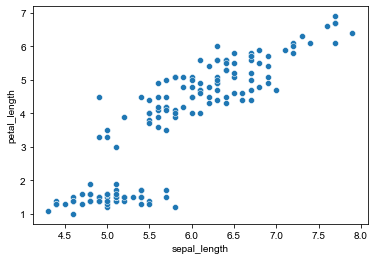

In [2]:
#Visualize the data
sns.scatterplot(x='sepal_length', y='petal_length', data=df)
sns.set()

# Problem 2
### Data Analysis

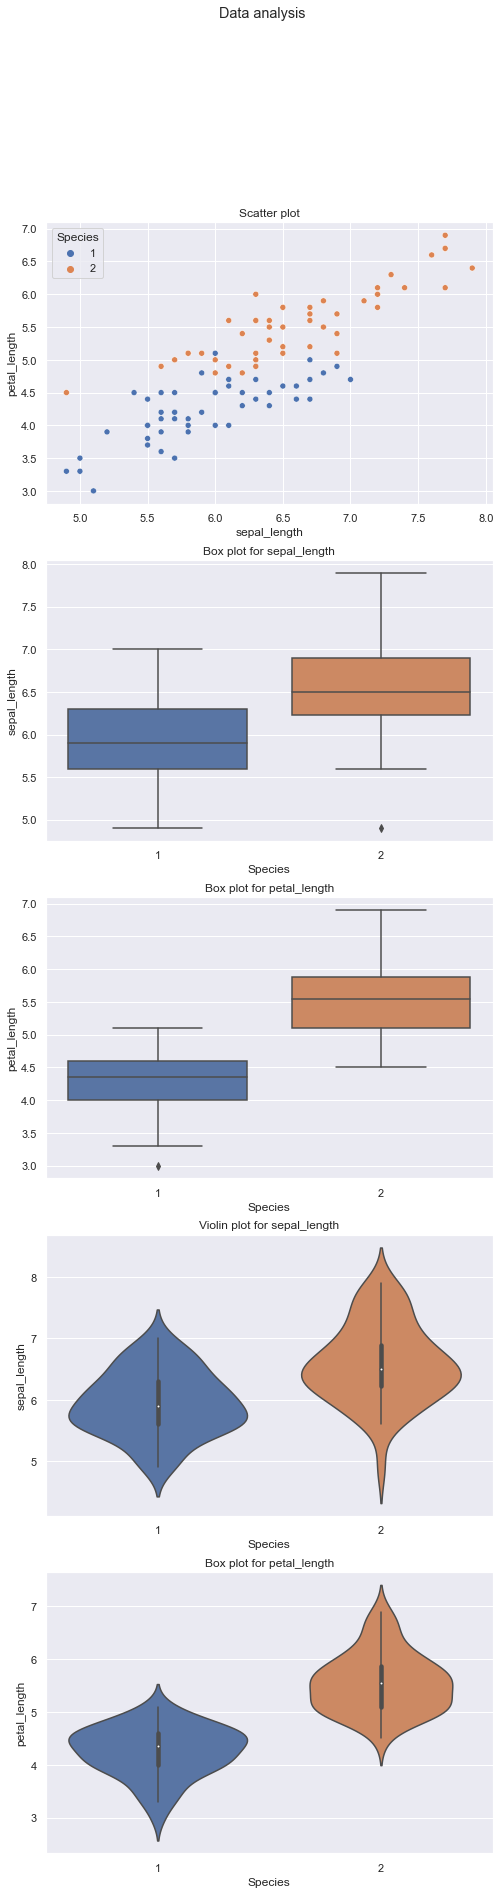

In [4]:
fig, ax = plt.subplots(5, 1, figsize=(8, 30))

fig.suptitle('Data analysis')

ax[0].title.set_text('Scatter plot')
sns.scatterplot(ax=ax[0], x='sepal_length', y='petal_length', hue='Species', palette='deep', data=df)
ax[1].title.set_text('Box plot for sepal_length')
sns.boxplot(ax=ax[1], x='Species', y='sepal_length', data=df)
ax[2].title.set_text('Box plot for petal_length')
sns.boxplot(ax=ax[2], x='Species', y='petal_length', data=df)
ax[3].title.set_text('Violin plot for sepal_length')
sns.violinplot(ax=ax[3], x='Species', y='sepal_length', data=df)
ax[4].title.set_text('Box plot for petal_length')
sns.violinplot(ax=ax[4], x='Species', y='petal_length', data=df)

sns.set()

# Problem 3
###  Division of preprocessing/training data and verification data

In [5]:
from sklearn.model_selection import train_test_split


#Convert DataFrame to ndarray
X = df.loc[:, 'sepal_length':'petal_length'].values
y = df.loc[:, 'Species'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 2) (25, 2) (75,) (25,)


# Problem 4
### Pretreatment/Standardization

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)
print(X_test_scaled)

[[-0.44316999 -1.05513635]
 [ 0.62409719  1.01225708]
 [ 1.3864309   1.24196747]
 [ 1.69136438  1.35682266]
 [ 2.1487646   2.0459538 ]
 [-1.05303696 -1.16999155]
 [-0.13823651 -0.71057078]
 [ 0.47163045 -0.59571559]
 [-0.59563673  0.20827075]
 [ 0.62409719 -0.59571559]
 [ 0.62409719  0.09341556]
 [-1.05303696 -0.82542597]
 [ 0.92903067  0.89740189]
 [ 1.53889764  1.58653304]
 [-1.2055037  -1.39970193]
 [ 0.31916371 -0.36600521]
 [-0.29070325  0.7825467 ]
 [-0.44316999 -0.4808604 ]
 [-0.90057022 -0.94028116]
 [-0.44316999 -0.13629483]
 [-0.29070325 -1.05513635]
 [-1.05303696 -1.51455712]
 [-0.90057022 -0.82542597]
 [-0.13823651  0.55283632]
 [-0.29070325 -0.02143964]
 [ 0.01423023  0.7825467 ]
 [ 0.01423023  1.24196747]
 [ 0.62409719  0.32312594]
 [ 0.01423023 -0.02143964]
 [ 0.16669697  0.7825467 ]
 [ 2.1487646   2.0459538 ]
 [ 1.3864309   1.35682266]
 [ 0.62409719  0.89740189]
 [-0.29070325 -0.25115002]
 [ 0.47163045 -0.36600521]
 [ 1.3864309   1.01225708]
 [-1.81537066 -2.20368826]
 

# Problem 5
### Learning and estimation

In [7]:
from sklearn.neighbors import KNeighborsClassifier
pd.set_option('display.max_columns', None)

neigh5 = KNeighborsClassifier()
neigh5.fit(X_train_scaled, y_train)
predict_5 = neigh5.predict(X_test_scaled)
result_5 = pd.DataFrame([predict_5, y_test], index=['Predict', 'Actual value'])
result_5

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Predict,2,2,2,2,2,2,1,2,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,2,1
Actual value,2,2,2,2,1,2,1,2,1,1,1,2,2,2,2,1,2,1,1,1,2,2,2,2,1


In [8]:
neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh3.fit(X_train_scaled, y_train)
predict_3 = neigh3.predict(X_test_scaled)
result_3 = pd.DataFrame([predict_3, y_test], index=['Predict', 'Actual value'])
result_3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Predict,2,2,2,2,1,2,1,2,1,1,1,2,1,2,2,1,2,1,1,1,2,1,2,2,1
Actual value,2,2,2,2,1,2,1,2,1,1,1,2,2,2,2,1,2,1,1,1,2,2,2,2,1


In [9]:
neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh1.fit(X_train_scaled, y_train)
predict_1 = neigh1.predict(X_test_scaled)
result_1 = pd.DataFrame([predict_1, y_test], index=['Predict', 'Actual value'])
result_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Predict,2,2,2,2,1,1,1,1,2,1,1,2,1,2,2,1,2,1,1,1,1,1,2,2,1
Actual value,2,2,2,2,1,2,1,2,1,1,1,2,2,2,2,1,2,1,1,1,2,2,2,2,1


# Problem 6
### Evaluation

Accuracy: measures overall correctness by comparing correctly predicted instances to the total number of instances. It's intuitive but may not be suitable for imbalanced datasets.

In [17]:
from sklearn.metrics import *

#Accurancy
acc_score = accuracy_score(y_test, predict_5) 
print("Accurancy: ",acc_score)

Accurancy 0.84


Precision: measures the relevance of positive predictions by comparing correctly predicted positive instances to the total predicted positive instances. High precision indicates fewer false positives.

In [19]:
#Precision
prec_score = precision_score(y_test, predict_5) 
print ("Precision: ",prec_score)

Precision:  0.75


Recall: measures the completeness of positive predictions by comparing correctly predicted positive instances to the actual positive instances. High recall indicates capturing most positive instances.

In [18]:
#Recall

from sklearn.metrics import recall_score

recall_score = recall_score(y_test, predict_5)
print("Recall: ",recall_score)

Recall:  0.9


F-measure: harmonic mean of precision and recall, providing a balanced measure of both. Useful when considering false positives and false negatives together.

In [26]:
from sklearn.metrics import f1_score

f1_score = f1_score(y_test, predict_5)
print("F-Measure: ",f1_score)

F-Measure:  0.8181818181818182


In [27]:
confusion_matrix = confusion_matrix(y_test, predict_5)
confusion_matrix

array([[ 9,  1],
       [ 3, 12]], dtype=int64)

# Problem 7
### Visualization

In [29]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

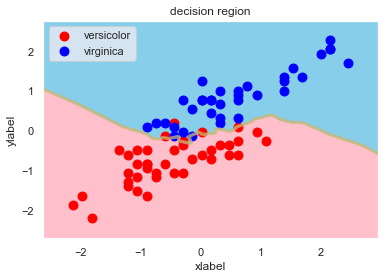

In [30]:
decision_region(X_train_scaled, y_train, neigh5)

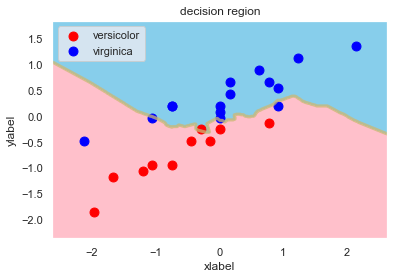

In [31]:
decision_region(X_test_scaled, y_test, neigh5)

# Problem 8
### Learning by other methods

In [45]:
# Function to calculate all scores/evaluations
from sklearn.metrics import *

def evaluation(test, predict):
    acc_score = accuracy_score(test, predict)
    prec_score = precision_score(test, predict)
    rec_score = recall_score(test, predict)
    f_score = f1_score(test, predict)
    conf_matrix = confusion_matrix(test, predict)
    print('Accuracy : {:.3f}'.format(acc_score))
    print('Precision: {:.3f}'.format(prec_score))
    print('Recall   : {:.3f}'.format(rec_score))
    print('F        : {:.3f}'.format(f_score))
    print('Confusion matrix:\n', conf_matrix)


- Logistic Regression

In [33]:
from sklearn.linear_model import *

#Using Logistic Regression
logregression = LogisticRegression()
logregression.fit(X_train_scaled, y_train)
log_predict = logregression.predict(X_test_scaled)
result_log = pd.DataFrame([log_predict, y_test], index=['Predict', 'Actual value'])
result_log

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Predict,2,2,2,2,1,2,1,2,1,1,1,2,1,1,2,1,2,1,1,1,1,2,2,2,1
Actual value,2,2,2,2,1,2,1,2,1,1,1,2,2,2,2,1,2,1,1,1,2,2,2,2,1


In [34]:

evaluation(y_test, log_predict)

Accuracy : 0.880
Precision: 0.769
Recall   : 1.000
F        : 0.870
Confusion matrix:
 [[10  0]
 [ 3 12]]


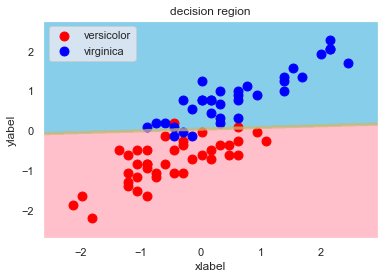

In [35]:
decision_region(X_train_scaled, y_train, logregression)

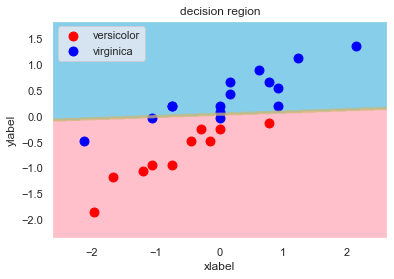

In [36]:
decision_region(X_test_scaled, y_test, logregression)

- SVM

In [42]:
#SVM

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming X_train_scaled, y_train, X_test_scaled, y_test are already defined
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train_scaled, y_train)
svm_predict = svm.predict(X_test_scaled)

# Create a DataFrame to display the predicted and actual values
result_svm = pd.DataFrame({'Predict': svm_predict, 'Actual value': y_test})
result_svm

,Predict,Actual value
0,2,2
1,2,2
2,2,2
3,2,2
4,1,1
5,2,2
6,1,1
7,2,2
8,1,1
9,1,1


In [43]:
evaluation(y_test, svm_predict)

Accuracy : 0.920
Precision: 0.833
Recall   : 1.000
F        : 0.909
Confusion matrix:
 [[10  0]
 [ 2 13]]


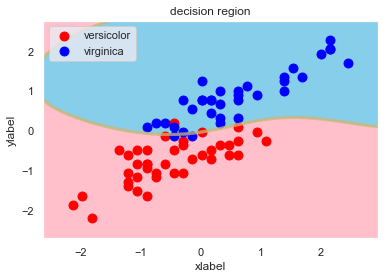

In [44]:
decision_region(X_train_scaled, y_train, svm)

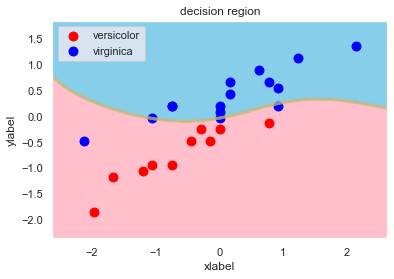

In [46]:
decision_region(X_test_scaled, y_test, svm)

- Decision Tree Classifier

In [47]:
from sklearn.tree import *

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train_scaled, y_train)
detree_predict = decisiontree.predict(X_test_scaled)
result_tree = pd.DataFrame([detree_predict, y_test], index=['Predict', 'Actual value'])
result_tree

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Predict,2,2,2,2,1,1,1,1,1,1,1,2,1,2,2,1,2,1,1,1,1,1,2,2,1
Actual value,2,2,2,2,1,2,1,2,1,1,1,2,2,2,2,1,2,1,1,1,2,2,2,2,1


In [48]:
evaluation(y_test, detree_predict)

Accuracy : 0.800
Precision: 0.667
Recall   : 1.000
F        : 0.800
Confusion matrix:
 [[10  0]
 [ 5 10]]


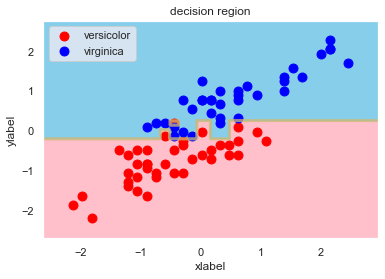

In [49]:
decision_region(X_train_scaled, y_train, decisiontree)

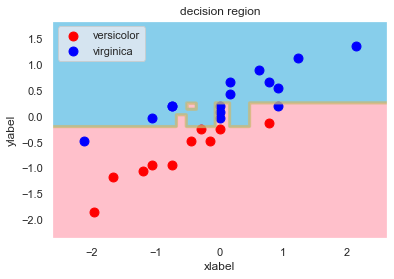

In [50]:
decision_region(X_test_scaled, y_test, decisiontree)

- Random forest classifier

In [52]:
from sklearn.ensemble import *

randomforest = RandomForestClassifier()
randomforest.fit(X_train_scaled, y_train)
rafo_predict = randomforest.predict(X_test_scaled)
result_rafo = pd.DataFrame([rafo_predict, y_test], index=['Predict', 'Actual value'])
result_rafo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Predict,2,2,2,2,1,2,1,2,1,1,1,2,1,1,2,1,2,1,1,1,1,2,2,2,1
Actual value,2,2,2,2,1,2,1,2,1,1,1,2,2,2,2,1,2,1,1,1,2,2,2,2,1


In [53]:
evaluation(y_test, rafo_predict)

Accuracy : 0.880
Precision: 0.769
Recall   : 1.000
F        : 0.870
Confusion matrix:
 [[10  0]
 [ 3 12]]


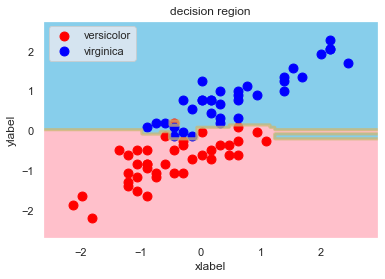

In [54]:
decision_region(X_train_scaled, y_train, randomforest)

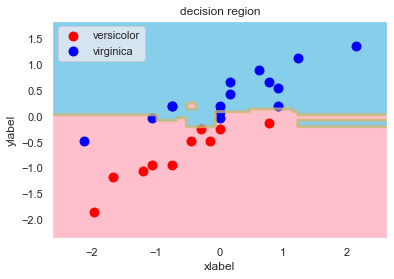

In [55]:
decision_region(X_test_scaled, y_test, randomforest)